# Processing data

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [70]:
url = r"..\data\raw\clean_house.csv"
house = pd.read_csv(url, sep=",")

## subsetting columns and rows

In [71]:
house.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik
3,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant
4,11128275,antwerpen merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,65.0,2.0,0.0,GOOD,antwerpen,antwerpen


In [72]:
def replace_outliers(df, columns):
    for column in columns:
    # Outliers handling
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        max_value = Q3 + (1.5 * IQR)
        min_value = Q1 - (1.5 * IQR)

        outliers_mask = (df[column] < min_value) | (df[column] > max_value)
        df.loc[outliers_mask, column] = np.nan

        df.dropna(subset=[column], inplace=True)
    return df

In [73]:
lcolm = ["price", "surface_of_good", "terrace_area", "garden_area"]
house = replace_outliers(house,lcolm)

## drop columns

In [74]:
def drop_columns(df, clist):
    ndf = df.drop(columns=clist)
    return ndf


In [75]:
todropcolumns = ["property_id", "locality_name", "latitude", "longitude", "property_type", "type_of_sale", "kitchen_type", "main_city", "postal_code","state_of_building", "property_subtype",]
nhouse = drop_columns(house, todropcolumns)

In [76]:

# dropping the NaN values in the columns selected
def droping_null(df, colist):
    df.dropna(subset=colist, inplace=True)
    return df



## transform categorical data to numerical data

In [77]:
def transform_categorical2(df, clist):
    for column in clist:
        # One-hot encode the current column
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_ohe = ohe.fit_transform(df[[column]])
        
        # Convert the one-hot encoded features to a DataFrame
        ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out())
        
        # Concatenate the original DataFrame with the one-hot encoded DataFrame
        df = pd.concat([df, ohe_df], axis=1)
        
        # Drop the original categorical column
        df.drop(columns=[column], inplace=True)

    return df

In [78]:
clist = ["province"]
chouse = transform_categorical2(nhouse, clist)


## Make the training set and test set

In [79]:
def create_X_y(df, Y):
    X = df.drop(columns=[Y])
    y = df[[Y]]
    return X, y




In [80]:
X, y = create_X_y(chouse, "price")

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0 )

## Imputation on the X_train, X_test

In [82]:
X_test.shape
X_train.shape 

(2432, 23)

In [83]:
X_train.head(5)

,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,...,province_brussel,province_henegouwen,province_limburg,province_luik,province_luxemburg,province_namen,province_oost-vlaanderen,province_vlaams-brabant,province_waals-brabant,province_west-vlaanderen
1717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2085,NaN,143.0,1.0,0.0,0.0,1.0,17.0,1.0,497.0,497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4771,NaN,175.0,1.0,0.0,0.0,1.0,26.0,1.0,49.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
def replace_NaN_Categorical(df, comlist):
    df[comlist] = df[comlist].fillna(0.0)
    

In [85]:
X_train = drop_columns(X_train, ["number_of_rooms", "furnished"])
X_test = drop_columns(X_test, ["number_of_rooms", "furnished"])

In [86]:
def change_to_int(df, columnsname):
    for column in columnsname:
        df[column] = df[column].round().astype(int)
    return df


In [87]:
def replace_null_median(df, columnname):
    for column in columnname:
        condition_1 = (df[column].isnull())
        df.loc[condition_1, column] = df[column].median()
    return df

In [88]:
def replace_null_mean(df, columnname):

    for column in columnname:
        condition_1 = (df[column].isnull())
        df.loc[condition_1, column] = df[column].mean()
    return df

In [89]:
def replace_null_to_zero(df, columnname):

    for column in columnname:
        condition_1 = (df[column].isnull())
        df.loc[condition_1, column] = 0
    return df

### replacing values

In [90]:
X_train = replace_null_mean(X_train, ["terrace_area", "garden_area"])
X_train = replace_null_mean(X_train, ["fully_equipped_kitchen", "number_of_facades", "swimming_pool"])

X_test = replace_null_mean(X_test, ["terrace_area", "garden_area"])
X_test = replace_null_mean(X_test, ["fully_equipped_kitchen", "number_of_facades", "swimming_pool"])

In [91]:
X_train = change_to_int(X_train, ["fully_equipped_kitchen", "number_of_facades", "swimming_pool"])
X_test = change_to_int(X_test, ["fully_equipped_kitchen", "number_of_facades", "swimming_pool"])

In [92]:
y_test = replace_null_mean(y_test, ["price"])
y_train = replace_null_mean(y_train, ["price"])

In [93]:
columns_with_null = X_train.columns[X_train.isnull().any()].tolist()
X_train = replace_null_to_zero(X_train, columns_with_null)
X_test = replace_null_to_zero(X_test, columns_with_null)

### scaling values

In [94]:
def scaling(df, cl):
    for column in cl:
        scaler = StandardScaler()
        #Fit and transform the data
        df[column] = scaler.fit_transform(df[[column]])
    return df

In [95]:
numerical_columns = ['living_area', 'terrace_area', 'garden_area', 'surface_of_good']
#X_test = scaling(X_test, numerical_columns)
#X_train = scaling(X_train, numerical_columns)

### testing the model

In [96]:
X_train.isnull().sum(), len(X_train)

(living_area                 0
 fully_equipped_kitchen      0
 open_fire                   0
 terrace                     0
 terrace_area                0
 garden                      0
 garden_area                 0
 surface_of_good             0
 number_of_facades           0
 swimming_pool               0
 province_antwerpen          0
 province_brussel            0
 province_henegouwen         0
 province_limburg            0
 province_luik               0
 province_luxemburg          0
 province_namen              0
 province_oost-vlaanderen    0
 province_vlaams-brabant     0
 province_waals-brabant      0
 province_west-vlaanderen    0
 dtype: int64,
 2432)

In [97]:
y_test.isnull().sum()

price    0
dtype: int64

In [98]:
X_train.head()

,living_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,...,province_brussel,province_henegouwen,province_limburg,province_luik,province_luxemburg,province_namen,province_oost-vlaanderen,province_vlaams-brabant,province_waals-brabant,province_west-vlaanderen
1717,0.0,1,0.0,0.0,24.598551,0.0,250.350725,0.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
709,0.0,1,0.0,0.0,24.598551,0.0,250.350725,0.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1649,0.0,1,0.0,0.0,24.598551,0.0,250.350725,0.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2085,143.0,1,0.0,1.0,17.000000,1.0,497.000000,497.0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4771,175.0,1,0.0,1.0,26.000000,1.0,49.000000,194.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [100]:
regressor.fit(X_train, y_train).predict(X_test)


array([[380540.97464178],
       [386367.96021085],
       [381435.14365978],
       [387768.49041608],
       [386367.96021085],
       [383752.16500657],
       [384105.03115019],
       [456151.0693575 ],
       [380305.08945012],
       [351556.59256164],
       [229979.08358892],
       [674718.70488452],
       [381435.14365978],
       [381435.14365978],
       [374635.47542173],
       [380305.08945012],
       [327739.12116657],
       [380305.08945012],
       [383139.07246826],
       [297086.69308714],
       [397024.41370136],
       [297039.77520786],
       [380305.08945012],
       [320855.22284482],
       [243609.35738564],
       [386367.96021085],
       [283326.50386061],
       [407113.33507588],
       [380305.08945012],
       [591072.11116368],
       [386367.96021085],
       [381435.14365978],
       [384105.03115019],
       [399785.3029926 ],
       [312703.13422306],
       [427729.11110632],
       [422720.69205897],
       [380305.08945012],
       [3863

In [101]:
regressor.score(X_train, y_train)

0.3549296676875938

In [102]:
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.3556060812251086

## Plotting the result

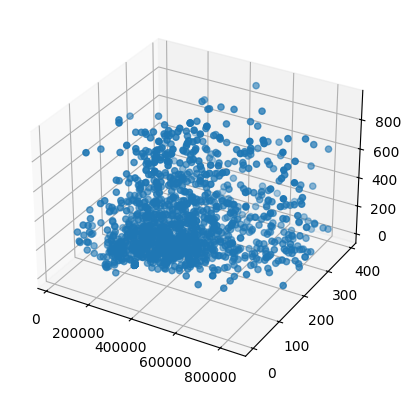

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_train['price'], X_train['living_area'], X_train['garden_area'])